# Flight Fare Prediction

## Problem statement :-                                                                                                                                                   To develop a flight pricing forecasting system based on machine learning principles in order to produce an optimal system for optimizing cost-effective plane tickets and facilities, resulting in thousands of satisfied clients.

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Loading the dataset

In [2]:
df= pd.read_csv('flight_fare_dataset.csv')
df

,sr_no,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,NaN
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,10956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,10955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,10955.0
...,...,...,...,...,...,...,...,...,...,...,...,...
276975,276975,NaN,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49.0,69265.0
276976,276976,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49.0,77105.0
276977,276977,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49.0,79099.0
276978,276978,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49.0,81585.0


### Exploratory data analysis

In [3]:
df.rename(columns = {'class':'flight_class'}, inplace = True)
df

,sr_no,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,NaN
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,10956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,10955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,10955.0
...,...,...,...,...,...,...,...,...,...,...,...,...
276975,276975,NaN,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49.0,69265.0
276976,276976,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49.0,77105.0
276977,276977,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49.0,79099.0
276978,276978,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49.0,81585.0


### Checking for Null values

In [4]:
df.isna().sum()

sr_no                 0
airline             170
flight              112
source_city         109
departure_time      138
stops               109
arrival_time         93
destination_city    108
flight_class        128
duration            109
days_left           126
price               228
dtype: int64

### Dropping Null values

In [5]:
df1 = df.dropna()

In [6]:
df1.isna().sum()

sr_no               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
flight_class        0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
df1.drop(['sr_no',"flight","duration"], axis=1, inplace=True)
df1.columns

/tmp/ipykernel_80939/1406330587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['sr_no',"flight","duration"], axis=1, inplace=True)


Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'flight_class', 'days_left', 'price'],
      dtype='object')

In [8]:
df1.to_csv('cleaned_dataset.csv')

In [9]:
df["airline"].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'Indigo', 'Air_India', nan],
      dtype=object)

### Label Encoding

In [10]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

df1[['airline','source_city','departure_time','stops','arrival_time','destination_city','flight_class']] = enc.fit_transform(df1[['airline','source_city','departure_time','stops','arrival_time','destination_city','flight_class']])

df1

with open('LabelEncode.pkl', 'wb') as file:
    pickle.dump(enc, file)

/tmp/ipykernel_80939/1143451274.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['airline','source_city','departure_time','stops','arrival_time','destination_city','flight_class']] = enc.fit_transform(df1[['airline','source_city','departure_time','stops','arrival_time','destination_city','flight_class']])


In [11]:
df1["source_city"].value_counts()

source_city
2.0    55205
5.0    55150
0.0    47447
4.0    42635
3.0    38146
1.0    37090
Name: count, dtype: int64

In [12]:
col = df1.columns

In [13]:
df1

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,days_left,price
0,3.0,2.0,2.0,2.0,5.0,5.0,1.0,1.0,5953.0
2,0.0,2.0,1.0,2.0,1.0,5.0,1.0,1.0,10956.0
3,4.0,2.0,4.0,2.0,0.0,5.0,1.0,1.0,10955.0
4,4.0,2.0,4.0,2.0,4.0,5.0,1.0,1.0,10955.0
5,4.0,2.0,4.0,2.0,0.0,5.0,1.0,1.0,10955.0
...,...,...,...,...,...,...,...,...,...
276974,1.0,1.0,1.0,0.0,5.0,3.0,0.0,49.0,68739.0
276976,4.0,1.0,0.0,0.0,5.0,3.0,0.0,49.0,77105.0
276977,4.0,1.0,1.0,0.0,5.0,3.0,0.0,49.0,79099.0
276978,4.0,1.0,1.0,0.0,2.0,3.0,0.0,49.0,81585.0


### Scaling the data

In [14]:
df1

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,days_left,price
0,3.0,2.0,2.0,2.0,5.0,5.0,1.0,1.0,5953.0
2,0.0,2.0,1.0,2.0,1.0,5.0,1.0,1.0,10956.0
3,4.0,2.0,4.0,2.0,0.0,5.0,1.0,1.0,10955.0
4,4.0,2.0,4.0,2.0,4.0,5.0,1.0,1.0,10955.0
5,4.0,2.0,4.0,2.0,0.0,5.0,1.0,1.0,10955.0
...,...,...,...,...,...,...,...,...,...
276974,1.0,1.0,1.0,0.0,5.0,3.0,0.0,49.0,68739.0
276976,4.0,1.0,0.0,0.0,5.0,3.0,0.0,49.0,77105.0
276977,4.0,1.0,1.0,0.0,5.0,3.0,0.0,49.0,79099.0
276978,4.0,1.0,1.0,0.0,2.0,3.0,0.0,49.0,81585.0


In [15]:
df1.corr()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,days_left,price
airline,1.000000,-0.022996,0.057817,-0.055166,0.041405,-0.026389,-0.194881,-0.007446,0.232671
source_city,-0.022996,1.000000,-0.001336,-0.002494,0.039596,-0.227316,-0.004232,-0.002566,0.004071
departure_time,0.057817,-0.001336,1.000000,-0.007822,-0.044734,-0.001717,-0.044189,-0.001426,0.043251
stops,-0.055166,-0.002494,-0.007822,1.000000,0.014098,-0.019210,0.105461,-0.005674,-0.187904
arrival_time,0.041405,0.039596,-0.044734,0.014098,1.000000,-0.039261,-0.022090,-0.001150,0.035130
destination_city,-0.026389,-0.227316,-0.001717,-0.019210,-0.039261,1.000000,-0.003005,-0.005704,0.002161
flight_class,-0.194881,-0.004232,-0.044189,0.105461,-0.022090,-0.003005,1.000000,0.007176,-0.832460
days_left,-0.007446,-0.002566,-0.001426,-0.005674,-0.001150,-0.005704,0.007176,1.000000,-0.094744
price,0.232671,0.004071,0.043251,-0.187904,0.035130,0.002161,-0.832460,-0.094744,1.000000


In [16]:
df1.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,days_left,price
count,275673.000000,275673.000000,275673.000000,275673.000000,275673.000000,275673.000000,275673.000000,275673.000000,275673.000000
mean,2.546753,2.569087,2.447824,0.283278,3.091848,2.578319,0.663206,25.896722,24109.759617
std,1.450422,1.748329,1.753076,0.663086,1.734293,1.739477,0.472615,13.645391,25565.052890
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-32089.000000
25%,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,14.000000,4975.000000
50%,2.000000,2.000000,2.000000,0.000000,4.000000,3.000000,1.000000,26.000000,8745.000000
75%,4.000000,4.000000,4.000000,0.000000,5.000000,4.000000,1.000000,38.000000,49207.000000
max,4.000000,5.000000,5.000000,2.000000,5.000000,5.000000,1.000000,49.000000,177531.000000


### Heat map

<AxesSubplot:>

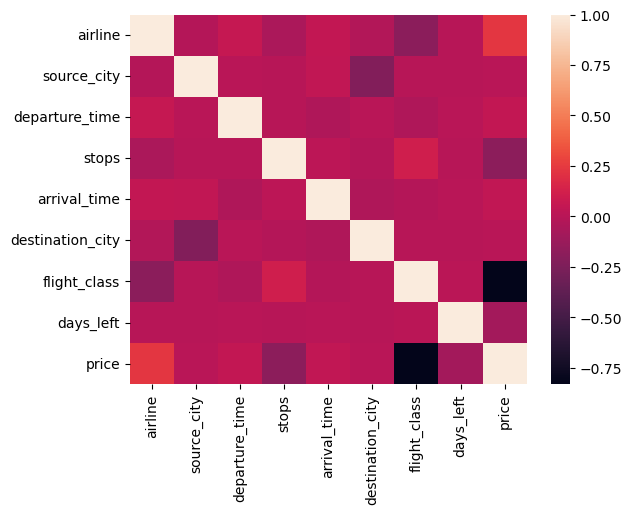

In [17]:
sns.heatmap(df1.corr())

### Pairplot

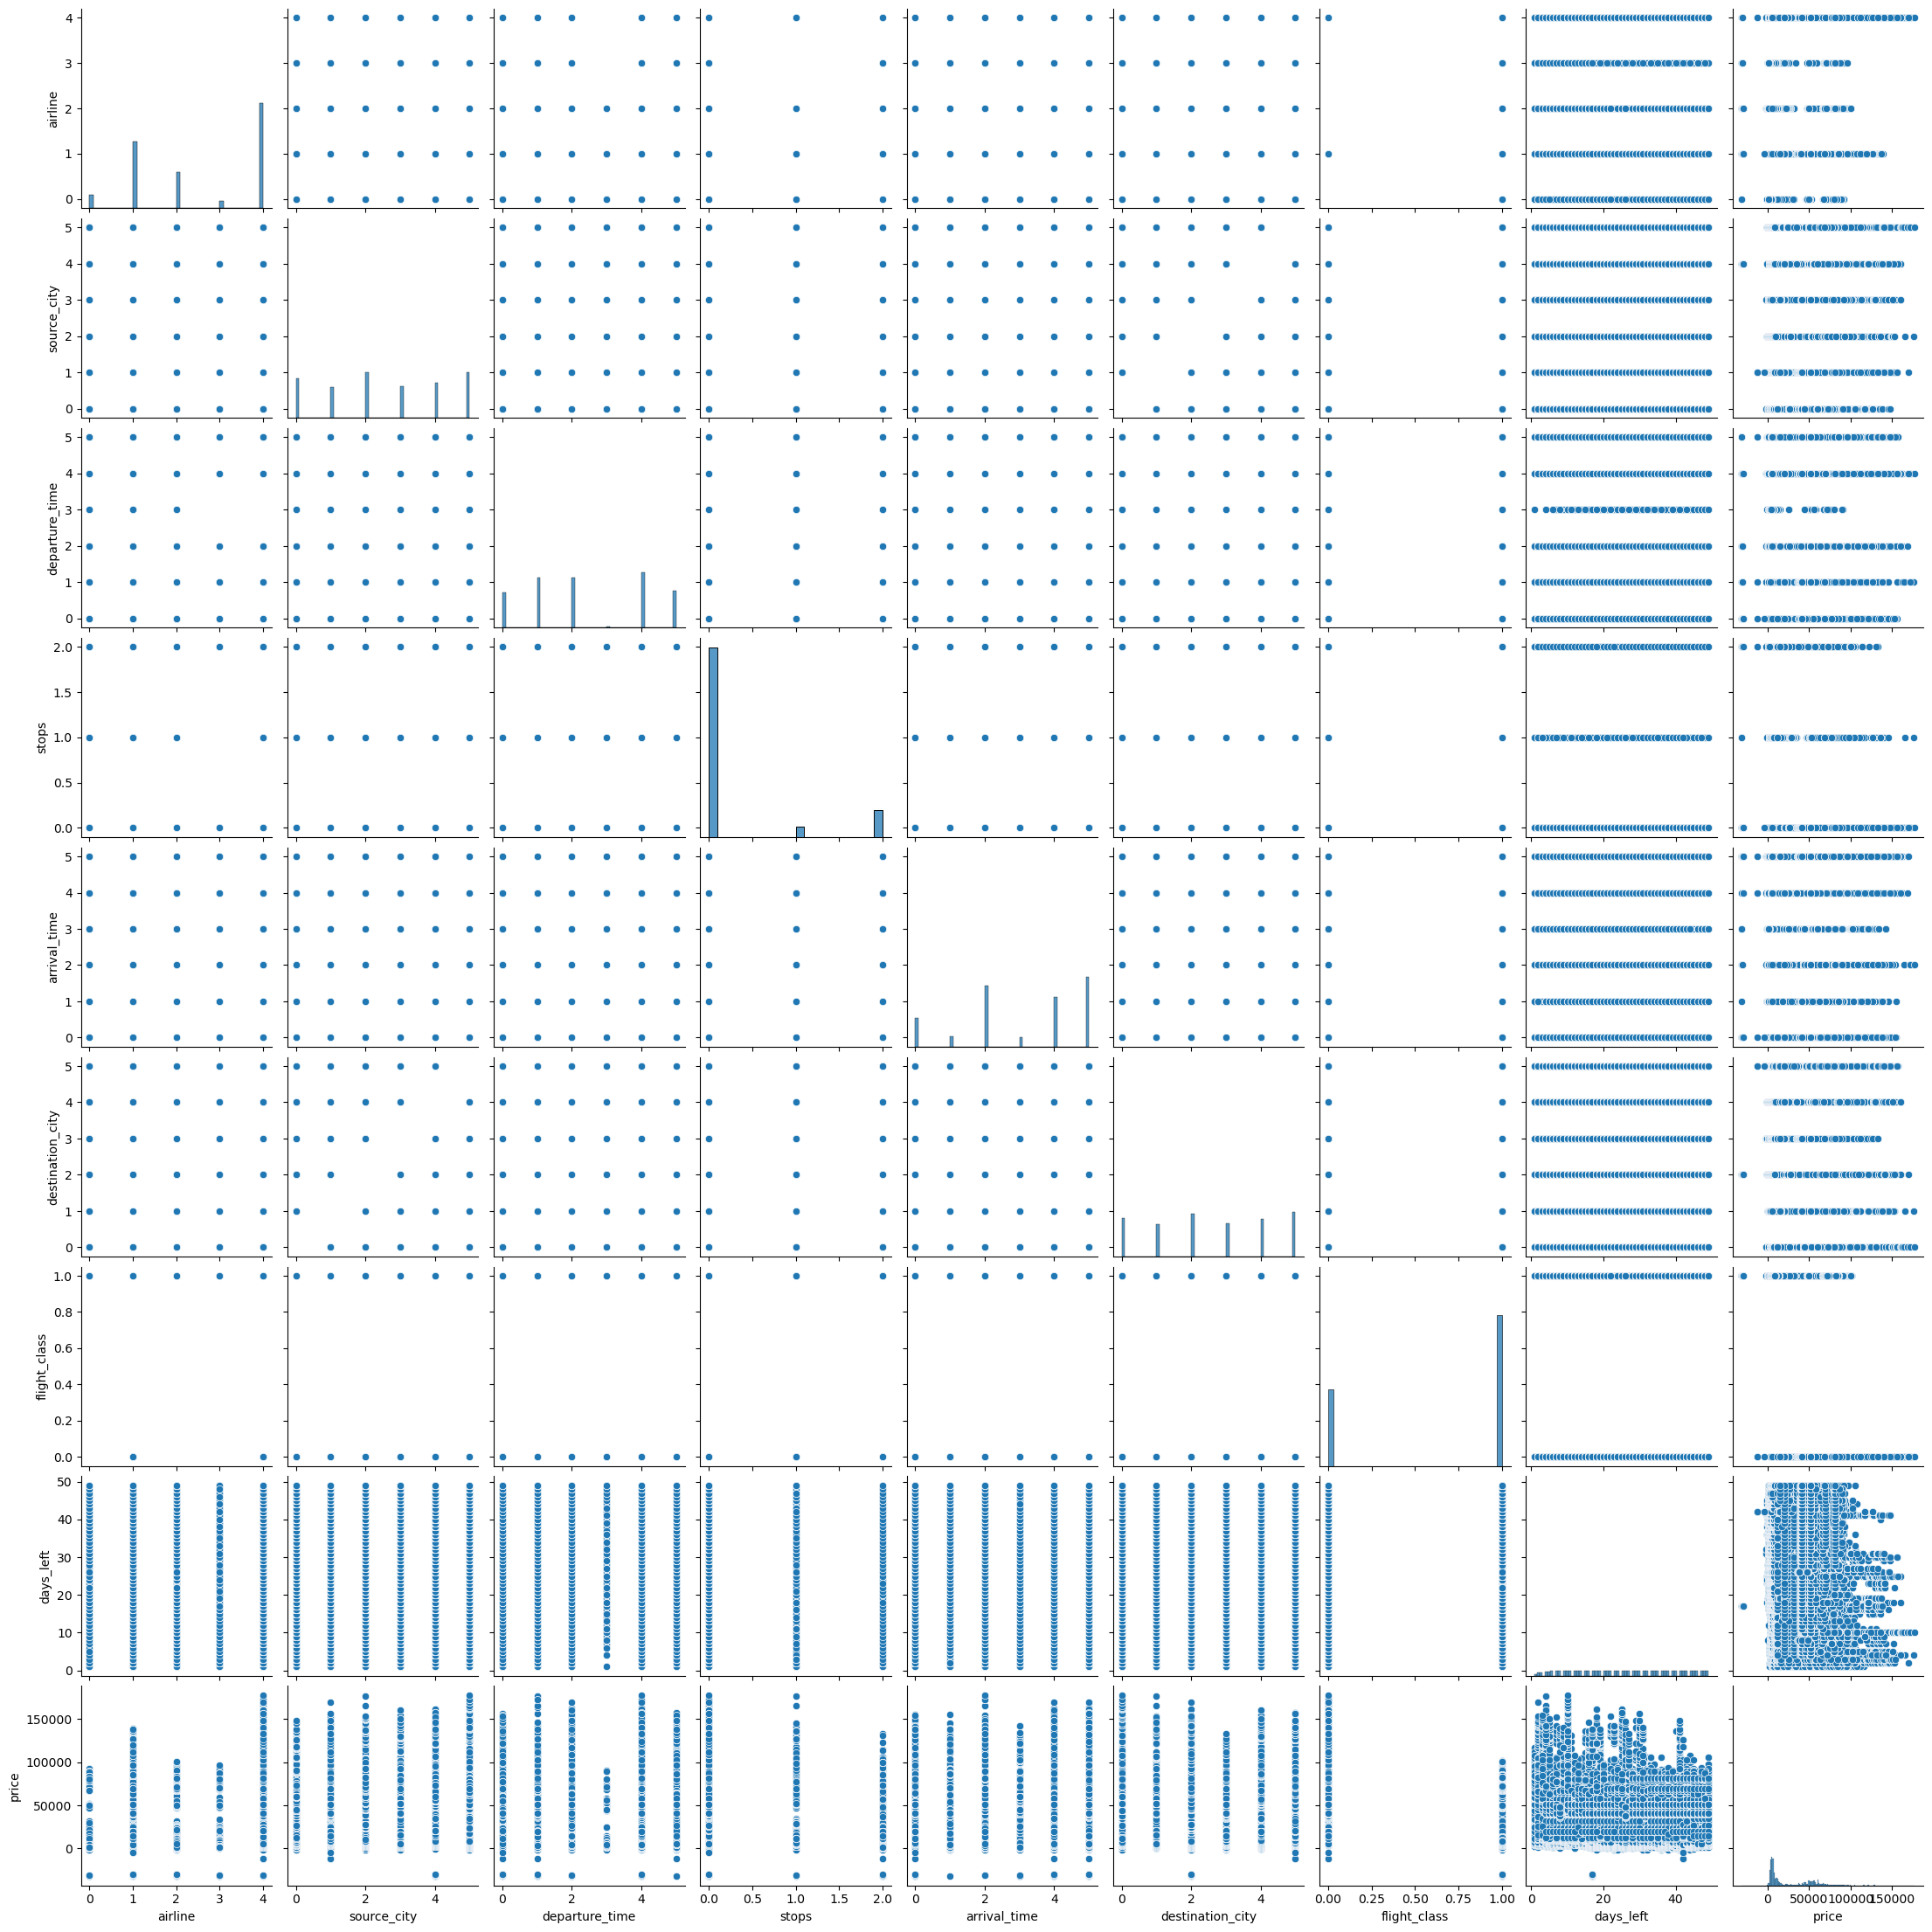

In [18]:
sns.pairplot(df1)

### Model building

In [19]:
X = df1.drop(['price'], axis=1)

Y = df1['price']

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y , train_size=0.7, random_state=12345)

In [21]:
def build_model_LR():
    from sklearn.linear_model import LinearRegression
    
    model = LinearRegression()
    
    model.fit(x_train,y_train)
    
    return model

In [22]:
def build_model_DT():
    from sklearn.tree import DecisionTreeRegressor
    
    model = DecisionTreeRegressor()
    
    model.fit(x_train,y_train)
    
    with open('decision.pkl', 'wb') as file:
        pickle.dump(model, file)
        
    return model

In [23]:
def build_model_RF():
    from sklearn.ensemble import RandomForestRegressor
    
    model = RandomForestRegressor()
    
    model.fit(x_train,y_train)

    with open('RandomForest.pkl', 'wb') as file:
        pickle.dump(model, file)

    return model

In [24]:
def bulid_model_SVM():
    from sklearn.svm import SVR
    
    model = SVR()
    
    model.fit(x_train,y_train)
    
    return model

In [25]:
def build_model_KNN():
    from sklearn.neighbors import KNeighborsRegressor
    
    model = KNeighborsRegressor()
    
    model.fit(x_train,y_train)
    
    return model

In [26]:
def build_model_XGB():
    from xgboost import XGBRegressor
    
    model = XGBRegressor()
    
    model.fit(x_train,y_train)
    
    return model

In [27]:
def build_model_CTB():
    from catboost import CatBoostRegressor
    
    model = CatBoostRegressor()
    
    model.fit(x_train,y_train)

    with open('cb.pkl', 'wb') as file:
        pickle.dump(model, file)
    
    return model

In [28]:
model_LR = build_model_LR()

In [29]:
model_DT = build_model_DT()

In [30]:
model_RF = build_model_RF()

In [31]:
model_SVM = bulid_model_SVM()

In [32]:
model_KNN = build_model_KNN()

In [33]:
model_XGB = build_model_XGB()

In [34]:
model_CTB = build_model_CTB()

Learning rate set to 0.094035
0:	learn: 23827.5329331	total: 90.2ms	remaining: 1m 30s
1:	learn: 22271.7279396	total: 120ms	remaining: 59.8s
2:	learn: 20909.3290876	total: 151ms	remaining: 50.2s
3:	learn: 19724.4150494	total: 177ms	remaining: 44.1s
4:	learn: 18706.4263946	total: 190ms	remaining: 37.9s
5:	learn: 17810.4592772	total: 207ms	remaining: 34.3s
6:	learn: 17028.0360228	total: 223ms	remaining: 31.7s
7:	learn: 16361.6436272	total: 237ms	remaining: 29.4s
8:	learn: 15794.5980092	total: 251ms	remaining: 27.7s
9:	learn: 15323.6598002	total: 262ms	remaining: 26s
10:	learn: 14901.1753203	total: 277ms	remaining: 24.9s
11:	learn: 14572.2408506	total: 287ms	remaining: 23.6s
12:	learn: 14275.1099669	total: 302ms	remaining: 22.9s
13:	learn: 14019.4600851	total: 316ms	remaining: 22.3s
14:	learn: 13809.3119300	total: 330ms	remaining: 21.7s
15:	learn: 13627.7984573	total: 345ms	remaining: 21.2s
16:	learn: 13473.7180965	total: 362ms	remaining: 20.9s
17:	learn: 13351.0500761	total: 378ms	remaini

In [35]:
x_test

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,days_left
222108,1.0,0.0,5.0,2.0,5.0,2.0,0.0,8.0
58380,1.0,5.0,0.0,0.0,4.0,4.0,1.0,37.0
268056,1.0,1.0,4.0,0.0,2.0,5.0,0.0,16.0
148192,1.0,3.0,1.0,0.0,5.0,0.0,1.0,40.0
49972,2.0,5.0,4.0,2.0,4.0,0.0,1.0,32.0
...,...,...,...,...,...,...,...,...
113246,1.0,4.0,1.0,0.0,5.0,5.0,1.0,21.0
18686,0.0,2.0,2.0,0.0,3.0,4.0,1.0,13.0
64454,1.0,5.0,1.0,0.0,2.0,3.0,1.0,35.0
115916,1.0,4.0,5.0,0.0,2.0,5.0,1.0,39.0


In [36]:
def evaluate_model(model):

    y_true = y_test
    y_pred = model.predict(x_test)
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

    mae = mean_absolute_error(y_true,y_pred)
    mse = mean_squared_error(y_true,y_pred)
    r2 = r2_score(y_true,y_pred)

    print(f"Mean absolute error = {mae}")
    print(f"Mean squared error  = {mse}")
    print(f"R2 score = {r2}")

In [37]:
evaluate_model(model_LR)

Mean absolute error = 7234.3668228872775
Mean squared error  = 185014539.9946677
R2 score = 0.7155754605916218


In [38]:
evaluate_model(model_DT)

Mean absolute error = 3282.152572940214
Mean squared error  = 71323205.23440239
R2 score = 0.890354186224992


In [39]:
evaluate_model(model_RF)

Mean absolute error = 3227.238330910493
Mean squared error  = 57088459.43554538
R2 score = 0.9122373907426041


In [40]:
evaluate_model(model_SVM)

Mean absolute error = 18442.310040934044
Mean squared error  = 883430713.1697905
R2 score = -0.35810609101195223


In [41]:
evaluate_model(model_KNN)

Mean absolute error = 7948.8855964789245
Mean squared error  = 167919701.52995625
R2 score = 0.7418555116445085


In [42]:
evaluate_model(model_XGB)

Mean absolute error = 5033.727509896299
Mean squared error  = 92746329.0704144
R2 score = 0.8574202226028789


In [43]:
evaluate_model(model_CTB)

Mean absolute error = 5061.974855693628
Mean squared error  = 100717765.57277463
R2 score = 0.8451656605794169
